<a href="https://colab.research.google.com/github/KenMuriuki/Financial-Prediction-Model/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2020_Kennedy_Muriuki_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Moringa Data Science Project Week 2

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Financial Inclusion remains one of the main obstacles to economic and human development in Africa. Access to bank accounts has been regarded as an indicator of financial inclusion. As a Data Scientist, you have been tasked with figuring out how we can predict which individuals are most likely to have or use a bank account.Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

In [176]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()


## 2. Reading the Data

In [267]:
# Loading the Data from the source i.e. csv
df_fin = pd.read_csv('Financial_Dataset.csv')


## 3. Checking the Data

In [268]:
# Determining the no. of records in our dataset
df_fin.shape

(23524, 13)

In [269]:
# Previewing the top of our dataset
df_fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [270]:
# Previewing the bottom of our dataset
df_fin.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [181]:
# Checking whether each column has an appropriate datatype

df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4. External Data Source Validation

Some comments here

## 5. Tidying the Dataset

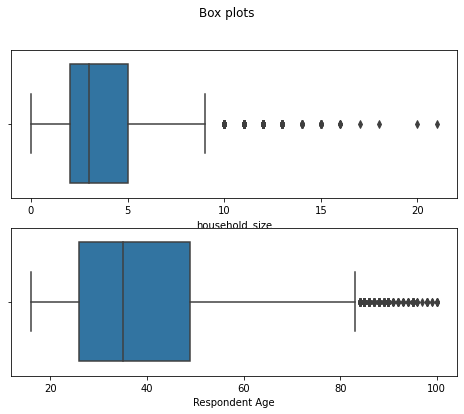

In [209]:
# Checking for Outliers
# box plots
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (8,6))
fig.suptitle('Box plots')
sns.boxplot(df_fin['household_size'], ax=ax1)
sns.boxplot(df_fin['Respondent Age'], ax=ax2)
plt.show()


In [215]:
df_fin.shape

(23524, 13)

In [271]:
# dropping the years that are out of range
df_fin1 = df_fin.drop(df_fin[df_fin['year'] > 2018].index)

In [272]:
df_fin1.shape

(23521, 13)

In [273]:
# Identifying if there is any Missing Data
df_fin1.isnull().values.any()

True

In [274]:
# identifying the missing data 
print(df_fin1.isnull().sum())
print(df_fin1.isnull().sum().sum())

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64
267


In [275]:
# Dropping with the Missing Data

df_fin1.dropna(inplace=True)

In [276]:
# Dropping the irrelevant columns
#df1 = df.drop(~['country','Type of Location','Cell Phone Access','household_size','Respondent Age','gender_of_respondent','Level of Educuation','Type of Job']])
df_fin1.drop(['year','uniqueid','Has a Bank account','The relathip with head','marital_status'], axis=1, inplace=True)
df_fin1.head()


,country,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [277]:
df_fin1.shape

(23340, 8)

In [278]:
# Checking for Anomalies in Age
q1_age, q3_age = np.percentile(df_fin1['Respondent Age'], (25,75))
IQR = q3_age -q1_age
print('IQR for age is ' + str(IQR))

print(df_fin1['Respondent Age'].describe())

IQR for age is 23.0
count    23340.000000
mean        38.807069
std         16.519905
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent Age, dtype: float64


In [279]:
# checking for the anomalies in Household size attribute
q1_size, q3_size = np.percentile(df_fin1['household_size'], (25,75))
iqr = q3_size -q1_size 

print('The iqr for household size is ' + str(iqr))
print(df_fin1['household_size'].describe())

The iqr for household size is 3.0
count    23340.000000
mean         3.688560
std          2.281275
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64


## 6. Exploratory Analysis

Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64


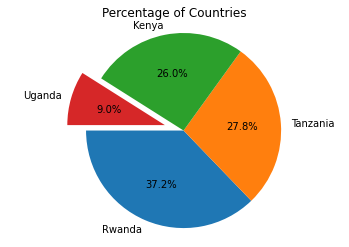

In [280]:
# Ploting the univariate summaries and recording our observations

# Pie chart to check the distribution of countries in the dataset

country_freg = df_fin1['country'].value_counts()
print(country_freg)
labels = 'Rwanda','Tanzania','Kenya','Uganda'
explode = (0,0,0,0.2)
plt.pie(country_freg, labels=labels, explode=explode, autopct= '%1.1f%%', startangle=180)
plt.title('Percentage of Countries')
plt.axis('equal')
plt.show()

Yes    17331
No      6009
Name: Cell Phone Access, dtype: int64


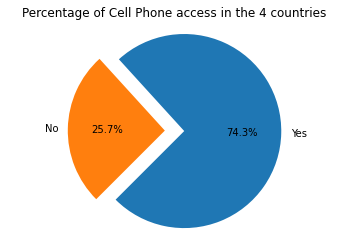

In [281]:
# Pie chart to check the distribution of cell phone access

cell_freg = df_fin1['Cell Phone Access'].value_counts()
print(cell_freg)
labels = 'Yes','No'
explode = (0,0.2)
plt.pie(cell_freg, labels=labels, explode=explode, autopct= '%1.1f%%', startangle=225)
plt.title('Percentage of Cell Phone access in the 4 countries')
plt.axis('equal')
plt.show()

Rural    14263
Urban     9077
Name: Type of Location, dtype: int64


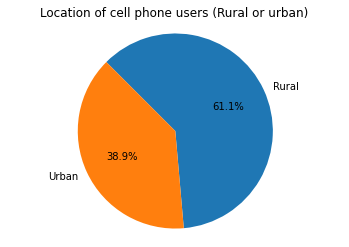

In [282]:
# pie chart to check the distribution of cell phone users in their countries (Rural or urban)

loc_freg = df_fin1['Type of Location'].value_counts()
print(loc_freg)
labels = 'Rural','Urban'
explode = (0,0)
plt.pie(loc_freg, labels=labels, explode=explode, autopct= '%1.1f%%', startangle=275)
plt.title('Location of cell phone users (Rural or urban)')
plt.axis('equal')
plt.show()

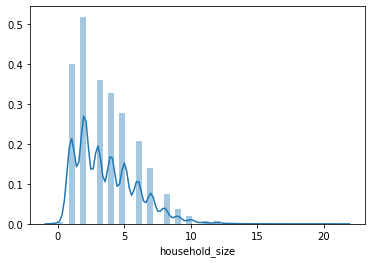

In [283]:
# Hist chart to show distribution of household size among the respondents
sns.distplot(df_fin1['household_size'], kde=True)
#plt.hist(df['household_size'], rwidth=0.9)

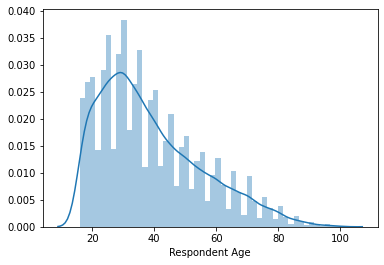

In [284]:
# Hist chart to show distribution of Respondent Age among the respondents
sns.distplot(df_fin1['Respondent Age'], kde=True)

In [285]:
# What is the mean, median and mode age of respondents 
print('The mean age of respondents is ' + str(df_fin1['Respondent Age'].mean()))
print('The median age of respondents is ' + str(df_fin1['Respondent Age'].median()))
print('The mode age of respondents is ' + str(df_fin1['Respondent Age'].mode()))

The mean age of respondents is 38.80706940874036
The median age of respondents is 35.0
The mode age of respondents is 0    30.0
dtype: float64


In [286]:
# What is the mean, median, and mode size of households

print('The mean size of households is ' + str(df_fin1['household_size'].mean()))
print('The median size of households is ' + str(df_fin1['household_size'].median()))
print('The mode size of households is ' + str(df_fin1['household_size'].mode()))

The mean size of households is 3.688560411311054
The median size of households is 3.0
The mode size of households is 0    2.0
dtype: float64


In [287]:
# skewness and kurtosis for Age
print("Skewness: %f" % df_fin1['Respondent Age'].skew())
print("Kurtosis: %f" % df_fin1['Respondent Age'].kurt())

Skewness: 0.840615
Kurtosis: 0.098268


In [288]:
# skewness and kurtosis for houshold size 
print("Skewness: %f" % df_fin1['household_size'].skew())
print("Kurtosis: %f" % df_fin1['household_size'].kurt())

Skewness: 0.974183
Kurtosis: 1.153836


-0.1196711523415487


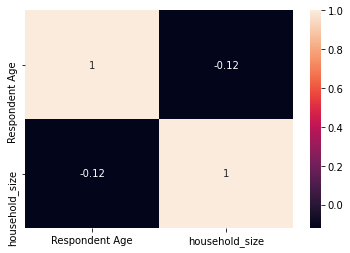

In [289]:
# Ploting the bivariate summaries and recording our observations

# To show the correlation between age and household size of respodents
print(df_fin1['household_size'].corr(df_fin1['Respondent Age'], method='pearson'))

corr_matrix = df_fin1[['Respondent Age','household_size']]
sns.heatmap(corr_matrix.corr(),annot=True)
plt.show()

In [ ]:
# Ploting the multivariate summaries and recording our observations


## 7. Data Reduction

In [290]:
df_fin1.head()

,country,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [291]:
# Encoding the categorical columns
gen_enc = {'gender_of_respondent':{'Male': 0, 'Female':1}}
df_fin1.replace(gen_enc, inplace=True)
df_fin1['gender_of_respondent']=df_fin1['gender_of_respondent'].astype('int')
df_fin1.head()

,country,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,Rural,Yes,3.0,24.0,1,Secondary education,Self employed
1,Kenya,Rural,No,5.0,70.0,1,No formal education,Government Dependent
2,Kenya,Urban,Yes,5.0,26.0,0,Vocational/Specialised training,Self employed
3,Kenya,Rural,Yes,5.0,34.0,1,Primary education,Formally employed Private
4,Kenya,Urban,No,8.0,26.0,0,Primary education,Informally employed


In [292]:
gen_enc = {'Type of Location':{'Rural': 0, 'Urban':1}}
df_fin1.replace(gen_enc, inplace=True)
df_fin1.head()
df_fin1['Type of Location']=df_fin1['Type of Location'].astype('int')
df_fin1.head()

,country,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,0,Yes,3.0,24.0,1,Secondary education,Self employed
1,Kenya,0,No,5.0,70.0,1,No formal education,Government Dependent
2,Kenya,1,Yes,5.0,26.0,0,Vocational/Specialised training,Self employed
3,Kenya,0,Yes,5.0,34.0,1,Primary education,Formally employed Private
4,Kenya,1,No,8.0,26.0,0,Primary education,Informally employed


In [293]:
gen_enc = {'Cell Phone Access':{'Yes': 0, 'No':1}}
df_fin1.replace(gen_enc, inplace=True)
df_fin1['Cell Phone Access']=df_fin1['Cell Phone Access'].astype('int')
df_fin1.head()


,country,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,0,0,3.0,24.0,1,Secondary education,Self employed
1,Kenya,0,1,5.0,70.0,1,No formal education,Government Dependent
2,Kenya,1,0,5.0,26.0,0,Vocational/Specialised training,Self employed
3,Kenya,0,0,5.0,34.0,1,Primary education,Formally employed Private
4,Kenya,1,1,8.0,26.0,0,Primary education,Informally employed


In [294]:
gen_enc = {'Level of Educuation':{'No formal education': 0, 'Primary education':1,'Secondary education':2,'Tertiary education':3,'Vocational/Specialised training':4,'6':5,'Other/Dont know/RTA':6}}
df_fin1.replace(gen_enc, inplace=True)
df_fin1['Level of Educuation']=df_fin1['Level of Educuation'].astype('int')
df_fin1.head()


,country,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,0,0,3.0,24.0,1,2,Self employed
1,Kenya,0,1,5.0,70.0,1,0,Government Dependent
2,Kenya,1,0,5.0,26.0,0,4,Self employed
3,Kenya,0,0,5.0,34.0,1,1,Formally employed Private
4,Kenya,1,1,8.0,26.0,0,1,Informally employed


In [295]:
gen_enc = {'Type of Job':{'Self employed': 0, 'Informally employed':1,'Farming and Fishing':2,'Remittance Dependent':3,'Other Income':4,'Formally employed Private':5,'No Income':6,'Formally employed Government':7,'Government Dependent':8,'Dont Know/Refuse to answer':9}}
df_fin1.replace(gen_enc, inplace=True)
df_fin1['Type of Job']=df_fin1['Type of Job'].astype('int')
df_fin1.head()


,country,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,0,0,3.0,24.0,1,2,0
1,Kenya,0,1,5.0,70.0,1,0,8
2,Kenya,1,0,5.0,26.0,0,4,0
3,Kenya,0,0,5.0,34.0,1,1,5
4,Kenya,1,1,8.0,26.0,0,1,1


In [296]:
# Dividing the data into feature set and label in Pre processing
x = df_fin1.drop('country', 1)
y = df_fin1['country']

In [297]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [299]:
# Performing normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [300]:
# applying the PCA
from sklearn.decomposition import PCA

pca=PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


In [301]:
# Explained Variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.21549798, 0.18826012, 0.15385163, 0.14420105, 0.12037332,
       0.09703261, 0.08078328])

In [302]:
# making predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test,y_pred))

[[  34  729  451    0]
 [  26 1548  202    0]
 [  18  145 1110    0]
 [  13  277  115    0]]
Accuracy 0.5766923736075407


In [312]:
# using three principal components
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test,y_pred))

[[ 116  666  432    0]
 [  97 1505  174    0]
 [  81  148 1044    0]
 [  25  262  118    0]]
Accuracy 0.5709083119108826


## 8. Implementing the Solution

In [ ]:
# Implementing the Solution

# The first 5 principal components predict the model to an accuracy of 82.23%.
# This therefore means that the predictors for the data are spread out in 5 diferent variables. 


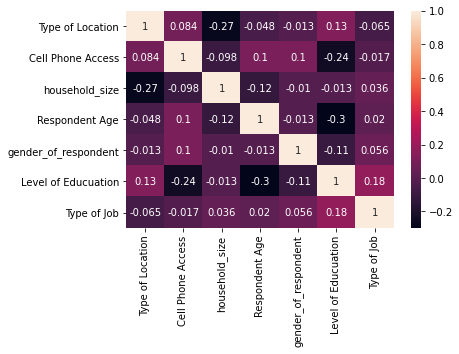

In [321]:

sns.heatmap(df_fin1.corr(),annot=True)
plt.show()

## 9. Challenging the solution

In [ ]:
# Reviewing the Solution 
# More data needs to be collected in the 4 East African countries to enable a more accurate prediction of the customer 
# traits and attributes.

# The data was a poor fit and therefore does not accurately predict individuals are most likely to have or use a bank accoun